# Analyse de base des étiquettes

Nous avons deux ensembles de données :
- IMDB_movies.csv : un ensemble complet de données d’informations sur le film
- train.csv : un ensemble de données pour piloter notre modèle

Dans ce jupyter, nous allons : 
- analyser les étiquettes des films IMDB_movies (total des films, total des genres, score moyen par genre, nombre de films par genre)
- analyser le dossier d'images :
    - analyse de base (total de films, total des genres, score moyen par genre, nombre de films par genre)
    - analyser les images de base (échantillons d’images, taille des images, valeur RVB moyenne par genre)

# Librairies nécessaires

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import imageio as ioo
from scipy import misc
from glob import glob

# Analyser le dataset IMDB_movies


Tout d’abord, nous analyserons l’ensemble de données complet défini par le csv. 

Pour cela, nous allons regarder :
- les colonnes du dataset
- le nombre de film
- le nombre de genre
- le nombre de film par genre

In [3]:
movies = pd.read_csv("../files/IMDB_movies.csv") 

#Print the label categories we are working with
print(movies.columns)

#Print the total amount of movies in the dataset
print("Total Number of Movies is: " + str(len(movies.index)))

#We will count the number of movies with a specific genre
genrelist = []
length = len(movies)
for n in range(0,length):
    genres = str(movies.loc[n]["genre"])
    genres = genres.split(r", ")
    genrelist.extend(genres)

#We will also display number of Genres     
unique_genres = list(set(genrelist))
print("Total Number of Genres is: " + str(len(unique_genres)))

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')
Total Number of Movies is: 81273
Total Number of Genres is: 26


Biography 2275
News 1
History 2178
Drama 44404
Action 12106
Horror 9041
Music 1566
Adult 2
Comedy 27873
Sport 1006
Western 1571
Fantasy 3599
Mystery 4839
Documentary 2
Sci-Fi 3474
Thriller 10814
Film-Noir 667
Musical 1991
Animation 2021
Crime 10461
Family 3694
Adventure 7082
Romance 13379
War 2172
Game-Show 1
Reality-TV 2


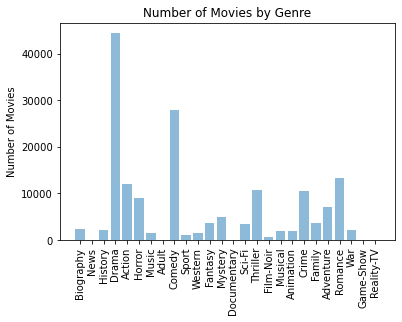

In [5]:
#Print amount of movies with specific genre
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))

#Create Bar Graph of values
y_pos = np.arange(len(unique_genres))
plt.bar(y_pos,countlist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

Musical 6.28
Western 6.01
Action 5.63
Mystery 5.86
Adventure 5.85
Music 6.27
Drama 6.27
Biography 6.66
Game-Show 5.60
Sport 6.06
Romance 6.16
Horror 4.87
Fantasy 5.77
Family 5.94
Film-Noir 6.71
Thriller 5.50
Adult 5.05
Animation 6.38
Reality-TV 4.60
Comedy 5.89
Crime 6.05
News 7.50
Documentary 7.00
War 6.46
Sci-Fi 5.10
History 6.58


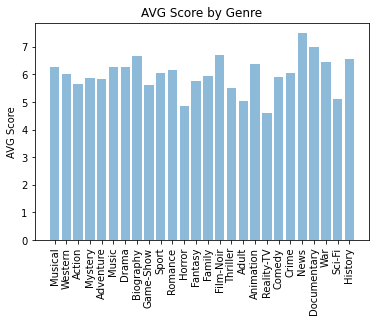

In [4]:
# We will also find the average score by genre
avglist = []
for genre in unique_genres:
    movies_of_genre = movies[movies["genre"].str.contains(genre,na=False)]
    avg = movies_of_genre["avg_vote"].mean()
    avglist.append(avg)
    print(genre + " {0:.2f}".format(avg))

plt.bar(y_pos,avglist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("AVG Score")
plt.title("AVG Score by Genre")
plt.show()

# Analyser le dossier d'images

## Analyse de base

Nous allons dans un premier temps récupérer toutes les images du dossier Multi_Label_dataset/Images et les mettre dans un DataFrame all_posters. 

Ce Dataframe est composé de 3 colonnes :
- path : le chemin de l'image
- filetype : l'extension
- Id : l'id de l'image



In [5]:
path = '../files/Multi_Label_dataset/Images'

all_posters = sorted(glob(path + '/*'))
all_posters = pd.DataFrame({'path' : all_posters})
all_posters['filetype'] = all_posters.apply(lambda row: row.path.split(".")[-1],axis=1)
all_posters['Id'] = all_posters.apply(lambda row: row.path.split("/")[-1],axis=1)
all_posters['Id'] = all_posters.apply(lambda row: row.Id.split(".")[0],axis=1)

all_posters.head()

path filetype         Id
0  ../files/Multi_Label_dataset/Images/tt0084058.jpg      jpg  tt0084058
1  ../files/Multi_Label_dataset/Images/tt0084867.jpg      jpg  tt0084867
2  ../files/Multi_Label_dataset/Images/tt0085121.jpg      jpg  tt0085121
3  ../files/Multi_Label_dataset/Images/tt0085154.jpg      jpg  tt0085154
4  ../files/Multi_Label_dataset/Images/tt0085159.jpg      jpg  tt0085159

Dans un premier, nous regardons si les images se trouvant dans le dossier Multi_Label_dataset/Images se retrouve dans le dataset IMDB_movies.csv. Ensuite, nous allons regarder le nombre d'image ainsi que le nombre de genre de film.

In [6]:
poster_ID = all_posters["Id"].values.tolist()
movies["imdb_title_id"] = movies["imdb_title_id"]

movies = movies[movies['imdb_title_id'].isin(all_posters["Id"])]

#Count unique genres again
genrelist = []
for n in range(0,length):
    try:
        genres = str(movies.loc[n]["genre"])
        genres = genres.split(r", ")
        genrelist.extend(genres)
    except:
        q=1
        
unique_genres = list(set(genrelist))
num_genres = len(unique_genres)
print("Total Number of Movies is : {}".format(len(movies)))
print("Total Number of Unique Genres is : {}".format(num_genres))

Total Number of Movies is : 6935
Total Number of Unique Genres is : 20


Musical 88
Action 1465
Western 43
Mystery 508
Adventure 984
Music 250
Drama 3876
Biography 388
Sport 205
Romance 1483
Horror 550
Fantasy 458
Family 448
Thriller 964
Animation 254
Comedy 3041
Crime 1256
Sci-Fi 383
War 118
History 182


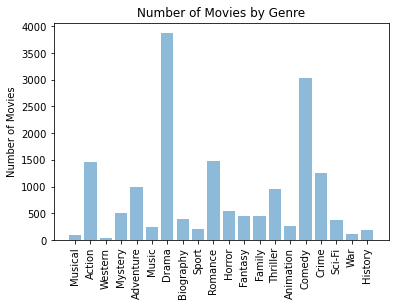

In [7]:
#Print amount of movies with specific genre
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))

#Create Bar Graph of values
y_pos = np.arange(len(unique_genres))
plt.bar(y_pos,countlist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

Musical 5.87
Action 6.02
Western 6.34
Mystery 6.20
Adventure 6.20
Music 6.17
Drama 6.45
Biography 6.95
Sport 6.18
Romance 6.17
Horror 5.69
Fantasy 6.03
Family 5.82
Thriller 6.14
Animation 6.52
Comedy 5.98
Crime 6.24
Sci-Fi 6.15
War 6.58
History 6.90


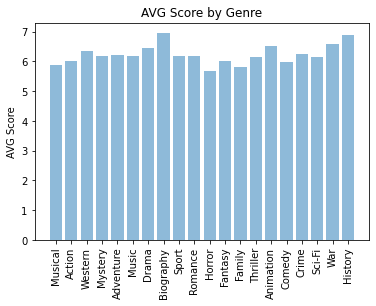

In [8]:
# We will also find the average score by genre
avglist = []
for genre in unique_genres:
    movies_of_genre = movies[movies["genre"].str.contains(genre,na=False)]
    avg = movies_of_genre["avg_vote"].mean()
    avglist.append(avg)
    print(genre + " {0:.2f}".format(avg))

plt.bar(y_pos,avglist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("AVG Score")
plt.title("AVG Score by Genre")
plt.show()

## Analyser les images

Dans un seconds temps, nous allons regarder les images de plus près :
- échantillons d’images
- taille des images
- valuer RVB moyenne par genre

Maintenant, nous allons afficher un film par genre. Il faut se rappeler que nous regardons les images dans le dossier IMDB_movies et qu'il a seulement 20 genres différents.

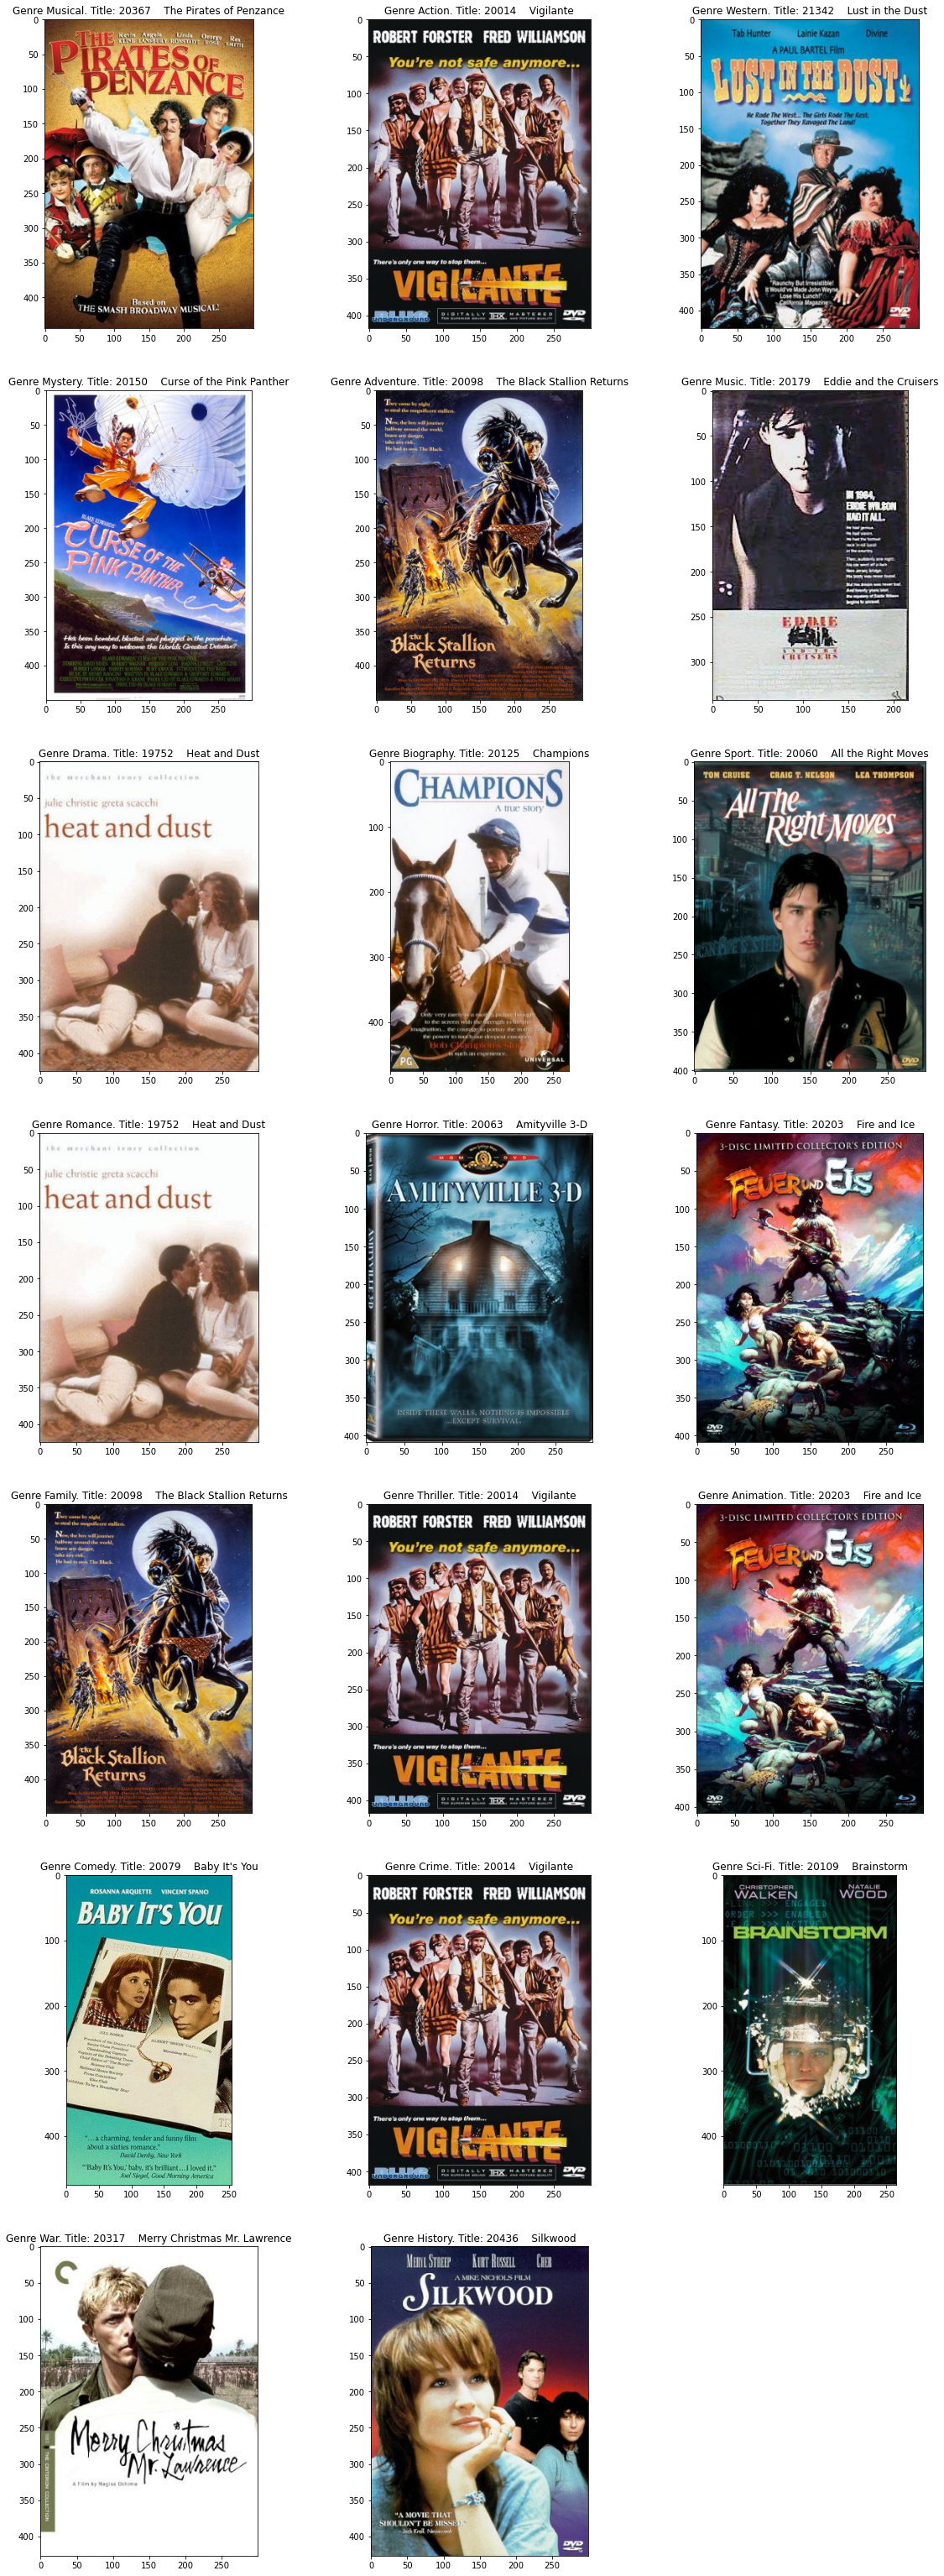

In [9]:
#We display 1 movie of each genre
fig = plt.figure(figsize=(20,80))
i=1

for genre in unique_genres:
    ax = fig.add_subplot(10,3,i)
    i+=1
    movies_of_genre = movies[movies["genre"].str.contains(genre,na=False)]
    
    poster_ID = movies_of_genre["imdb_title_id"].values.tolist()

    all_posters_subset = all_posters[all_posters["Id"].isin(poster_ID)]
    sample = all_posters_subset.values[0]
    plt.imshow(plt.imread(sample[0]))
    ID = sample[2]
    title_of_movie = movies_of_genre[movies_of_genre["imdb_title_id"] == ID]["title"]
    
    plt.title('Genre {}. Title: {}'.format(genre,title_of_movie.to_string()))

In [23]:
from collections import defaultdict

indices = []
images = []
for _, row in movies.iterrows():
   # try:
        path = all_posters[all_posters["Id"] == row["imdb_title_id"]]['path'].values[0]
        img = ioo.imread(path)
        images.append(img)
        indices.append(row["imdb_title_id"])
   # except:
    #    print('image read failed for {}'.format(path))

print("Images read in : {}".format(len(images)))
movie_im = pd.DataFrame(
        {
            'ID': indices,
            'images': images
        }
    )

Images read in : 6935


In [24]:
movie_im

ID                                             images
0     tt0084058  [[[19, 21, 20], [10, 12, 11], [18, 20, 19], [1...
1     tt0084867  [[[14, 18, 19], [14, 18, 19], [14, 18, 19], [1...
2     tt0085121  [[[255, 255, 255], [255, 255, 255], [255, 255,...
3     tt0085154  [[[64, 89, 85], [62, 87, 84], [57, 82, 79], [5...
4     tt0085159  [[[248, 253, 249], [252, 255, 253], [246, 251,...
...         ...                                                ...
6930  tt4819560  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...
6931  tt4944352  [[[113, 86, 19], [113, 85, 20], [110, 81, 21],...
6932  tt5049302  [[[7, 1, 1], [7, 1, 1], [7, 1, 1], [7, 1, 1], ...
6933  tt5061814  [[[248, 177, 25], [248, 178, 22], [250, 178, 1...
6934  tt5257730  [[[212, 212, 212], [212, 212, 212], [212, 212,...

[6935 rows x 2 columns]

In [34]:
images[3]

Array([[[ 64,  89,  85],
        [ 62,  87,  84],
        [ 57,  82,  79],
        ...,
        [ 65,  95,  95],
        [ 59,  89,  89],
        [ 45,  75,  75]],

       [[ 91, 113, 110],
        [ 89, 111, 108],
        [ 83, 105, 103],
        ...,
        [ 58,  88,  86],
        [ 49,  79,  79],
        [ 34,  64,  64]],

       [[ 99, 120, 115],
        [ 98, 119, 114],
        [ 95, 116, 111],
        ...,
        [ 51,  80,  78],
        [ 41,  71,  69],
        [ 29,  59,  57]],

       ...,

       [[147, 156, 139],
        [144, 153, 136],
        [142, 151, 134],
        ...,
        [ 59,  80,  85],
        [ 60,  80,  87],
        [ 72,  95, 101]],

       [[117, 128, 112],
        [115, 126, 110],
        [112, 123, 107],
        ...,
        [ 64,  85,  90],
        [ 55,  78,  84],
        [ 68,  91,  97]],

       [[120, 143, 137],
        [119, 142, 136],
        [110, 131, 126],
        ...,
        [ 64,  90,  89],
        [ 68,  94,  93],
        [ 66,  95,  93]]

In [38]:
dfs = []
dfs = pd.DataFrame(
        {
            'rows': list(map(lambda i: i.shape[0], images)),
            'columns': list(map(lambda i: i.shape[1], images)),
            'channels': list(map(lambda i: i.shape[2], images))
        }
    )

df_grouped = dfs.groupby(by=['channels', 'columns', 'rows']).size().reset_index().sort_values(['channels', 0], ascending=False)
df_grouped

channels  columns  rows    0
356         3      300   444  920
357         3      300   445  853
362         3      300   450  376
336         3      300   424  225
337         3      300   425  225
..        ...      ...   ...  ...
405         3      300   502    1
406         3      300   530    1
407         3      300   533    1
408         3      300   541    1
409         3      300   542    1

[410 rows x 4 columns]

In [45]:
import random
images[random.randint(0,1018)].shape

False


(323, 216, 3)

In [ ]:
#Next we will plot the average R,G,B, values for each genre
red_avg = []
blue_avg = []
green_avg = []

for genre in unique_genres:
    red = np.array([],dtype=np.uint8,ndmin=1)
    green = np.array([],dtype=np.uint8,ndmin=1)
    blue = np.array([],dtype=np.uint8,ndmin=1)
    movies_of_genre = movies[movies["genre"].str.contains(genre,na=False)]
    poster_ID = movies_of_genre["imdb_title_id"].values.tolist()

    movie_im_subset = movie_im[movie_im["ID"].isin(poster_ID)]
    for _, row in movie_im_subset.iterrows():
        im = row['images']
        red = np.append(red,np.ravel(im[:,:,0]))
        green = np.append(red,np.ravel(im[:,:,1]))
        blue = np.append(red,np.ravel(im[:,:,2]))
    
    
    red_avg.append(np.average(red))
    green_avg.append(np.average(green))
    blue_avg.append(np.average(blue))

fig, ax = plt.subplots(figsize=(20,20))
index = np.arange(len(unique_genres))
bar_width = 0.2
opacity = 0.4
 
rects1 = plt.bar(index, red_avg, bar_width,
                 alpha=opacity,
                 color='#ff8080',
                 label='Red')
 
rects2 = plt.bar(index + bar_width, green_avg, bar_width,
                 alpha=opacity,
                 color='#39ac73',
                 label='Green')

rects3 = plt.bar(index + 2*bar_width, blue_avg, bar_width,
                 alpha=opacity,
                 color='#4d94ff',
                 label='Blue')
 
plt.xlabel('Genre',fontsize=30)
plt.ylabel('Average Intensity',fontsize=30)
plt.title('Color Intensity Averages by Genre',fontsize=50)
plt.xticks(index + bar_width, (unique_genres),rotation='vertical',fontsize=30)
plt.yticks(fontsize=20)
 
plt.tight_layout()
plt.show()  

In [48]:
#Next we will plot the average R,G,B, values for each genre
red_avg = []
blue_avg = []
green_avg = []

for genre in unique_genres:
    red = np.array([],dtype=np.uint8,ndmin=1)
    movies_of_genre = movies[movies["genre"].str.contains(genre,na=False)]
    poster_ID = movies_of_genre["imdb_title_id"].values.tolist()

    movie_im_subset = movie_im[movie_im["ID"].isin(poster_ID)]
    for row in movie_im_subset.iterrows():
        im = row['images']
        red = np.append(red,np.ravel(im[:,:,0]))
    
    
    red_avg.append(np.average(red))

fig, ax = plt.subplots(figsize=(20,20))
index = np.arange(len(unique_genres))
bar_width = 0.2
opacity = 0.4
 
rects1 = plt.bar(index, red_avg, bar_width,
                 alpha=opacity,
                 color='#ff8080',
                 label='Red')
 
plt.xlabel('Genre',fontsize=30)
plt.ylabel('Average Intensity',fontsize=30)
plt.title('Color Intensity Averages by Genre',fontsize=50)
plt.xticks(index + bar_width, (unique_genres),rotation='vertical',fontsize=30)
plt.yticks(fontsize=20)
 
plt.tight_layout()
plt.show()  

KeyboardInterrupt: 

In [55]:
#Next we will plot the average R,G,B, values for each genre
red_avg = []

for genre in unique_genres:
    red = np.array([],dtype=np.uint8,ndmin=1)
    movies_of_genre = movies[movies["genre"].str.contains(genre,na=False)]
    poster_ID = movies_of_genre["imdb_title_id"].values.tolist()

    movie_im_subset = movie_im[movie_im["ID"].isin(poster_ID)]
    for _, row in movie_im_subset.iterrows():
        im = row['images']
        red = np.append(red,np.ravel(im[:,:,0]))
    
    red_avg.append(np.average(red))

KeyboardInterrupt: 